In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier



In [2]:
glass = pd.read_csv("/content/glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
glass.drop(columns=['Ba','Fe'],inplace =True)  #removed columns because of no main data in IQR as its 0

In [5]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1.0
...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Type    214 non-null    float64
dtypes: float64(8)
memory usage: 62.6 KB


In [7]:
glass.duplicated().sum()            # checked all duplicates in data

785

In [8]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,1.0
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
glass.drop_duplicates(inplace = True) # removed all duplicates from data

In [10]:
glass.isna().sum()

RI      1
Na      1
Mg      1
Al      1
Si      1
K       1
Ca      1
Type    1
dtype: int64

In [11]:
glass.dropna(inplace = True)   #removed null values

In [12]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Type    0
dtype: int64

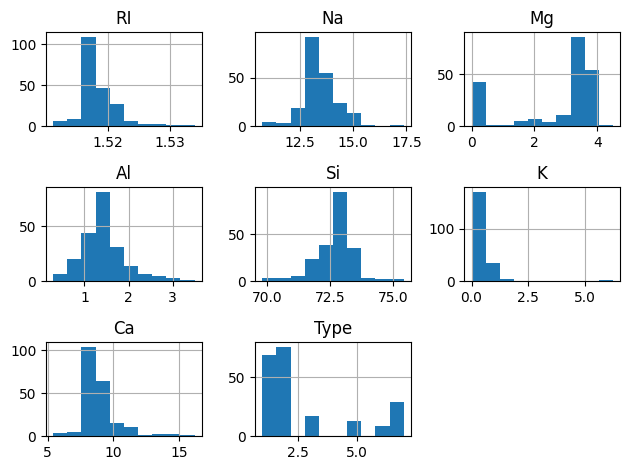

In [13]:
glass.hist()
plt.tight_layout()

<Axes: >

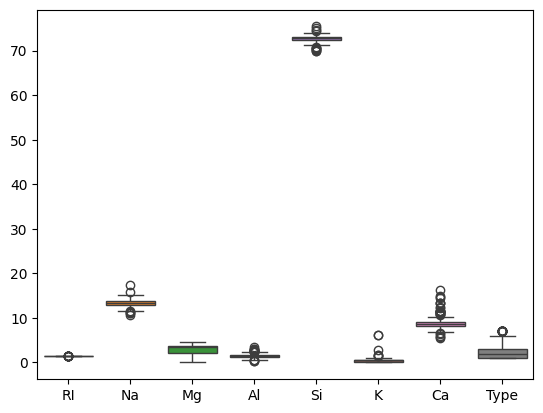

In [14]:
sns.boxplot(glass)  #we can observe a lot of outliers in almost all of them

In [15]:
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)                #user defined function for outlier detection
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme

In [16]:
outlier_detection(glass, glass.columns)

(RI       1.512575
 Na      11.535000
 Mg      -0.175000
 Al       0.530000
 Si      71.065000
 K       -0.590000
 Ca       6.875000
 Type    -2.000000
 dtype: float64,
 RI       1.523095
 Na      15.175000
 Mg       5.865000
 Al       2.290000
 Si      74.305000
 K        1.330000
 Ca      10.515000
 Type     6.000000
 dtype: float64)

In [17]:
glass.loc[glass['RI']>1.52311,'RI'] = 1.52311             #fixing the outliers
glass.loc[glass['RI']<1.51257,'RI'] = 1.51257

In [18]:
glass.loc[glass['Na']>15.20125,'Na'] = 15.20125
glass.loc[glass['Na']<11.53125,'Na'] = 11.53125

In [19]:
glass.loc[glass['Al']>2.290000,'Al'] = 2.290000
glass.loc[glass['Al']<0.530000,'Al'] = 0.530000

In [20]:
glass.loc[glass['Si']>74.305000,'Si'] = 74.305000
glass.loc[glass['Si']<71.065000,'Si'] = 71.065000

In [21]:
glass.loc[glass['K']>1.330000,'K'] = 1.330000

In [22]:
glass.loc[glass['Ca']>10.515000,'Ca'] = 10.515000
glass.loc[glass['Ca']<6.875000,'Ca'] = 6.875000

In [23]:
glass.loc[glass['Type']>6.000000,'Type'] = 6.000000

<Axes: >

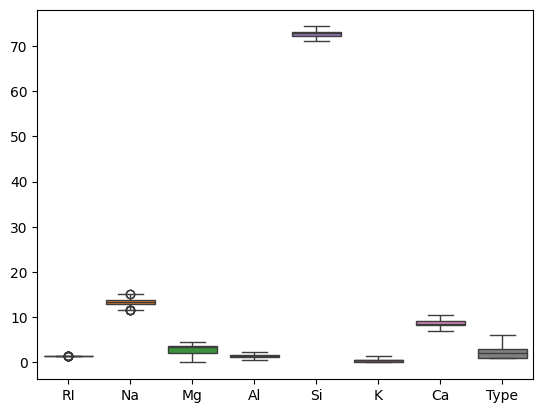

In [24]:
sns.boxplot(glass)   #removed almost all outliers

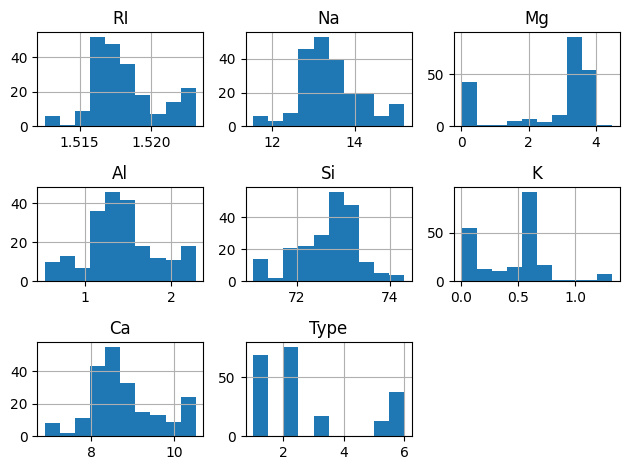

In [25]:
glass.hist()
plt.tight_layout()            #shows removal of skewness

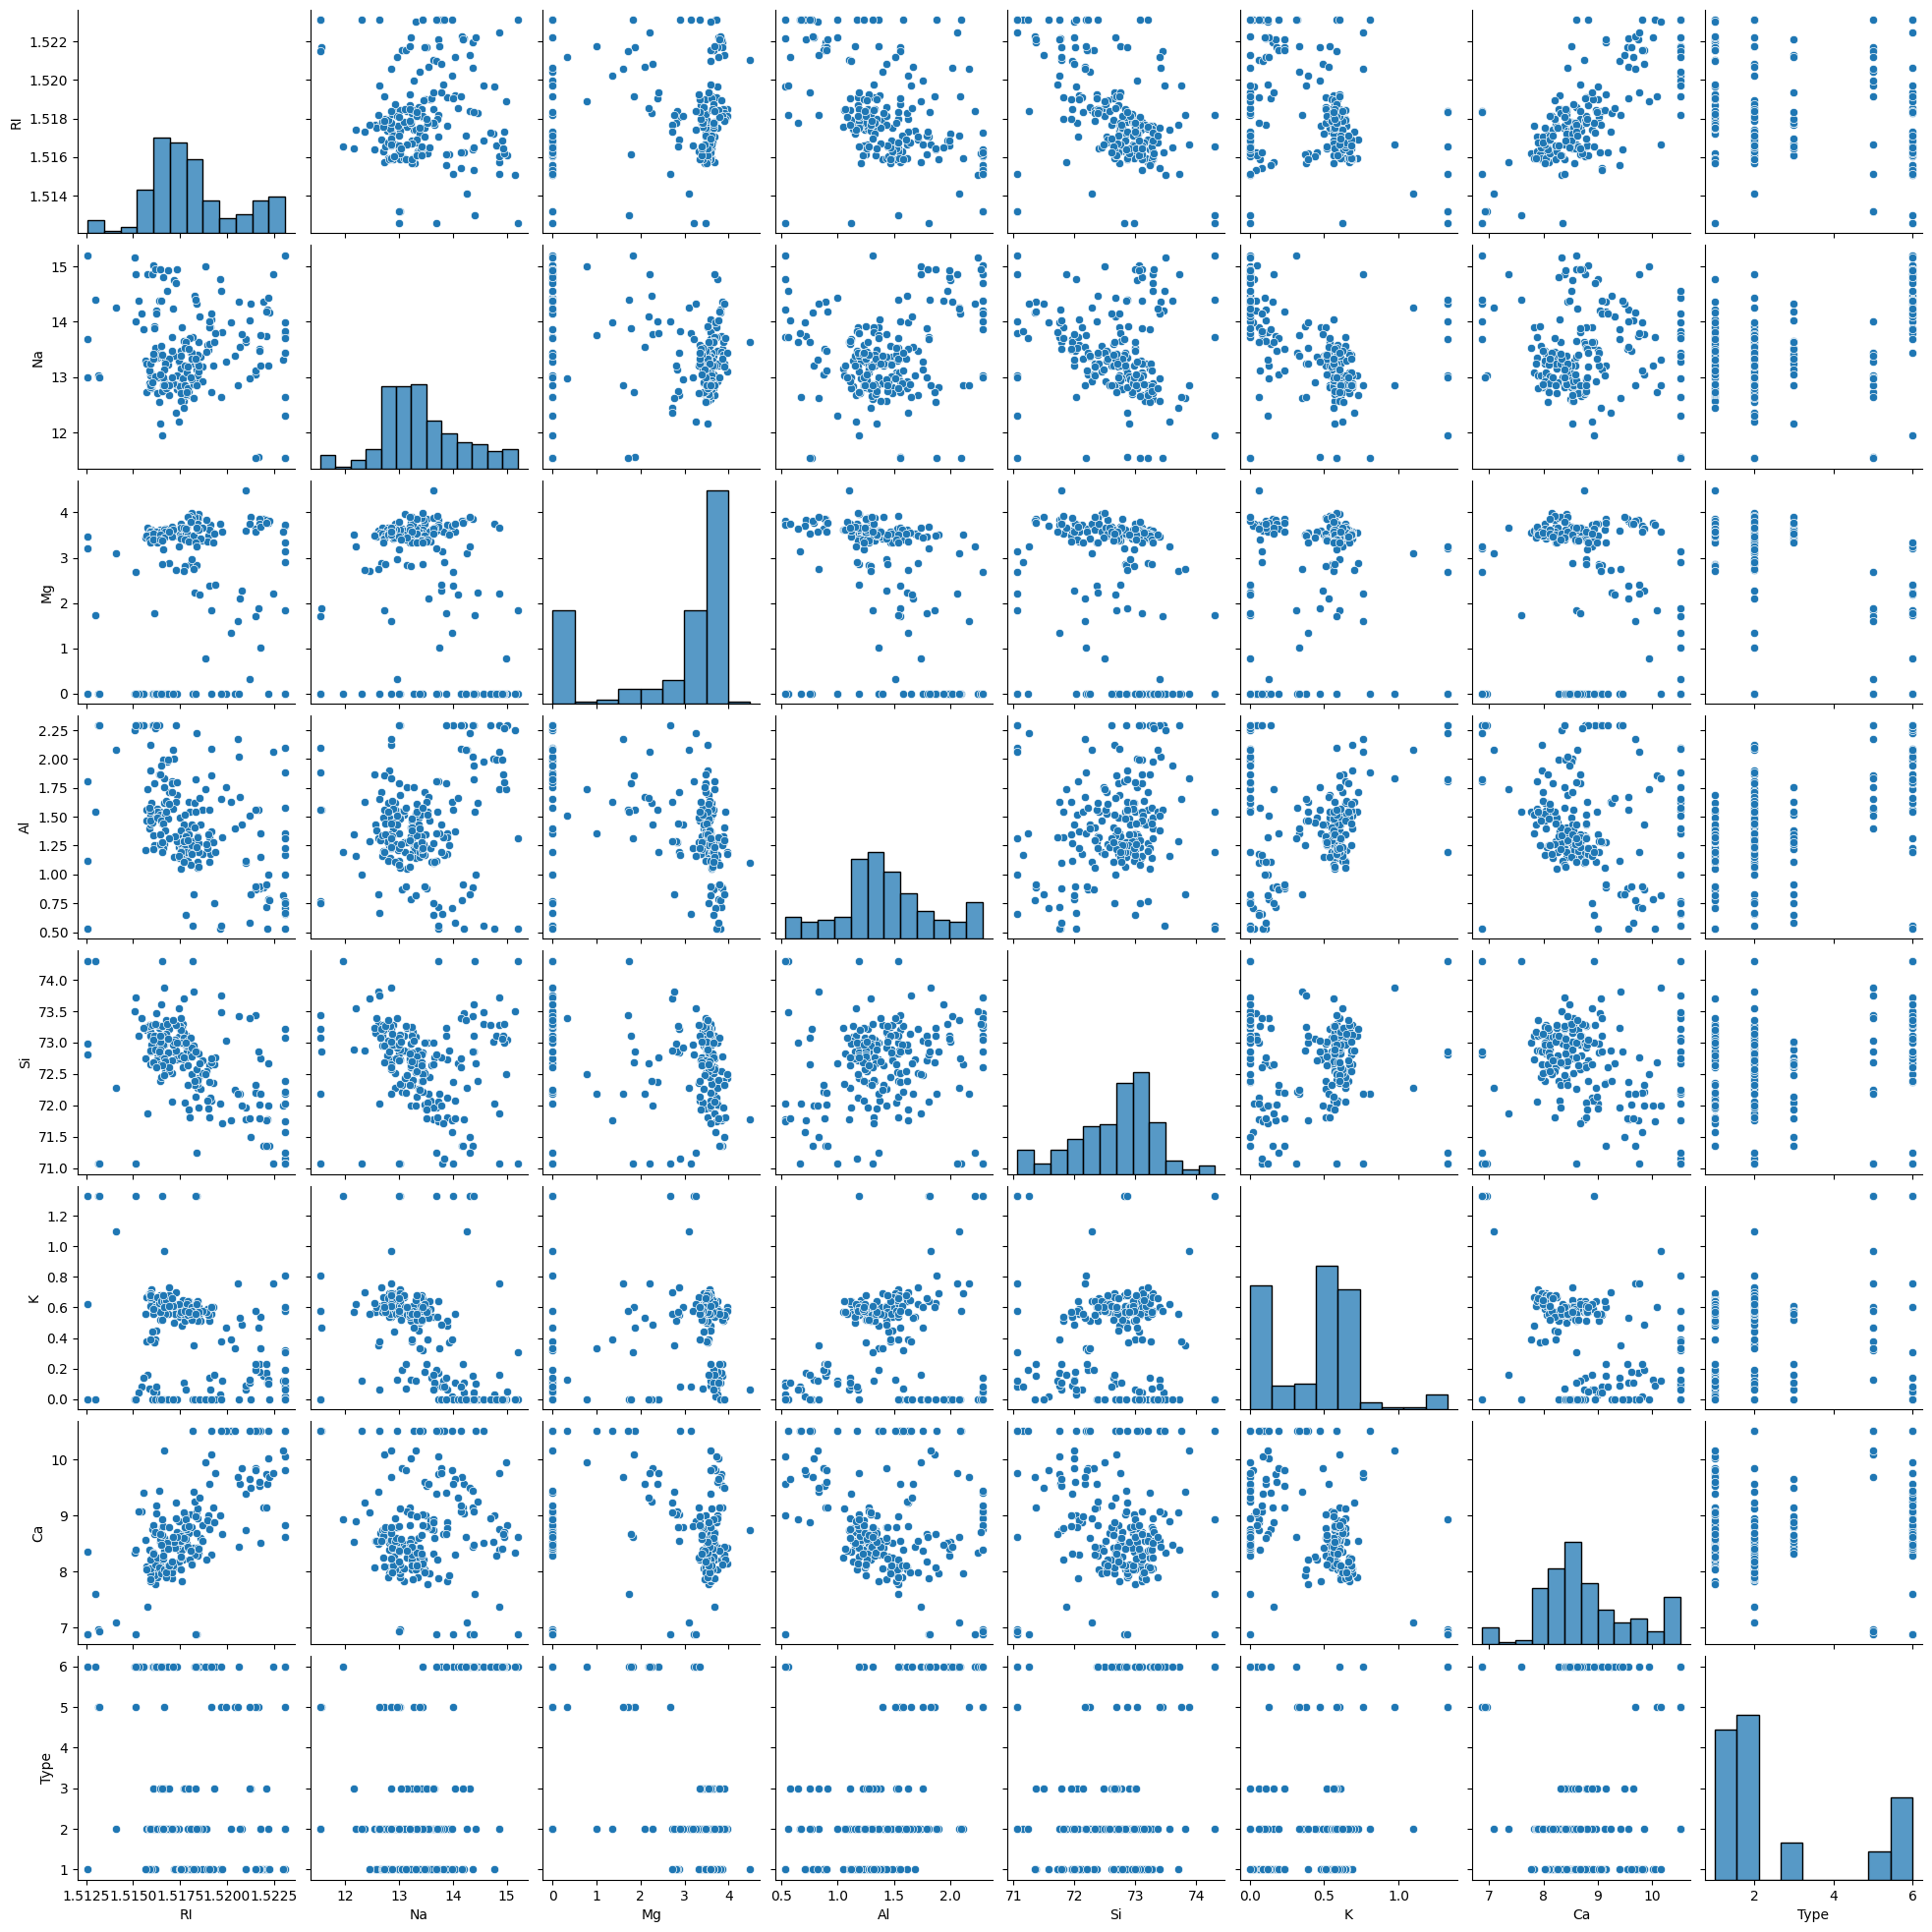

In [26]:
sns.pairplot(glass) #pairplot shows relation between all columns

<Axes: >

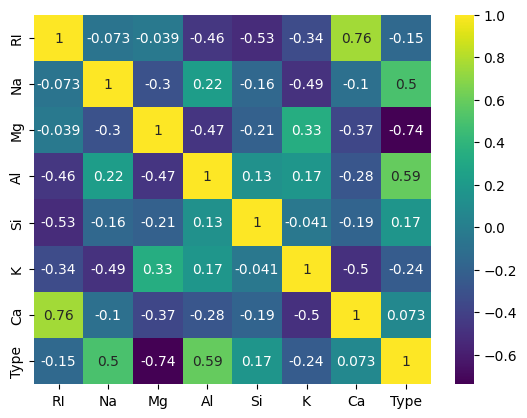

In [38]:
sns.heatmap(glass.corr(),annot=True,cmap='viridis')   #we can observe high positive correlation between RI and Ca and high negative corr between RI and Si

In [28]:
x=glass.iloc[:,0:7]                   #divided independent and dependent data
y=glass.iloc[:,7]

In [29]:
from sklearn.preprocessing import StandardScaler                  #scaling the independent data into standard form for better calculation of output
sc = StandardScaler()

In [30]:
sc.fit_transform(x)

array([[ 1.21454948,  0.32210997,  1.25723832, ..., -1.36107829,
        -1.25353611, -0.04441938],
       [-0.22737959,  0.6596136 ,  0.63931074, ...,  0.08664139,
         0.12479895, -1.11573287],
       [-0.83383799,  0.17360838,  0.6045957 , ...,  0.48285941,
        -0.17055856, -1.17395642],
       ...,
       [ 1.06187464,  1.29412042, -1.86017161, ...,  1.13814306,
        -1.45044112, -0.40540545],
       [-0.69388605,  1.32112071, -1.86017161, ...,  1.42768699,
        -1.45044112, -0.3588266 ],
       [-0.43942798,  1.11861853, -1.86017161, ...,  1.04670813,
        -1.45044112, -0.19580063]])

In [31]:
scaled_data = pd.DataFrame(sc.fit_transform(x),columns=x.columns)
scaled_data

,RI,Na,Mg,Al,Si,K,Ca
0,1.214549,0.322110,1.257238,-0.773927,-1.361078,-1.253536,-0.044419
1,-0.227380,0.659614,0.639311,-0.154741,0.086641,0.124799,-1.115733
2,-0.833838,0.173608,0.604596,0.273927,0.482859,-0.170559,-1.173956
3,-0.206175,-0.258396,0.701798,-0.321445,-0.096228,0.420156,-0.661589
4,-0.307958,-0.177395,0.653197,-0.440519,0.620012,0.354521,-0.836260
...,...,...,...,...,...,...,...
208,-0.812633,0.997117,-1.860172,2.060042,-0.096228,-1.187901,0.456303
209,-0.549693,2.050129,-1.860172,1.345596,0.589533,-1.450441,-0.451984
210,1.061875,1.294120,-1.860172,1.417041,1.138143,-1.450441,-0.405405
211,-0.693886,1.321121,-1.860172,1.226522,1.427687,-1.450441,-0.358827


In [32]:
array = x.values
X = array[:,0:7]                         #taking out array values for further model building of decision tree and bagging and boosting
Y = y.values
seed = 7

In [33]:
# Import the necessary modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# Train the decision tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1)
model.fit(X_train, Y_train)

# Predict the labels for the test data
ypred = model.predict(X_test)

# Print the classification report
print(classification_report(Y_test, ypred))

# Print the training and testing accuracy
print('Train Accuracy: ', model.score(X_train, Y_train))
print('Test Accuracy: ', model.score(X_test, Y_test))

              precision    recall  f1-score   support

         1.0       0.64      0.90      0.75        20
         2.0       0.78      0.50      0.61        28
         3.0       0.00      0.00      0.00         3
         5.0       0.57      0.80      0.67         5
         6.0       0.78      0.88      0.82         8

    accuracy                           0.67        64
   macro avg       0.55      0.61      0.57        64
weighted avg       0.68      0.67      0.66        64

Train Accuracy:  0.7785234899328859
Test Accuracy:  0.671875


bagging

In [34]:
from sklearn.ensemble import BaggingClassifier


In [35]:
kfold = KFold(n_splits=10,random_state=seed,shuffle=True) # evaluation method
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(estimator = cart, n_estimators = num_trees , random_state = seed)
model.fit(X_train, Y_train)

# Predict the labels for the test data
ypred = model.predict(X_test)

# Print the classification report
print(classification_report(Y_test, ypred))

# Print the training and testing accuracy
print('Train Accuracy: ', model.score(X_train, Y_train))
print('Test Accuracy: ', model.score(X_test, Y_test))

              precision    recall  f1-score   support

         1.0       0.76      0.95      0.84        20
         2.0       0.88      0.75      0.81        28
         3.0       0.33      0.33      0.33         3
         5.0       1.00      0.40      0.57         5
         6.0       0.80      1.00      0.89         8

    accuracy                           0.80        64
   macro avg       0.75      0.69      0.69        64
weighted avg       0.81      0.80      0.79        64

Train Accuracy:  1.0
Test Accuracy:  0.796875


boosting

In [36]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [37]:
model = AdaBoostClassifier(n_estimators = num_trees , random_state = seed)
model.fit(X_train, Y_train)

# Predict the labels for the test data
ypred = model.predict(X_test)

# Print the classification report
print(classification_report(Y_test, ypred))

# Print the training and testing accuracy
print('Train Accuracy: ', model.score(X_train, Y_train))
print('Test Accuracy: ', model.score(X_test, Y_test))

              precision    recall  f1-score   support

         1.0       0.67      0.70      0.68        20
         2.0       0.69      0.32      0.44        28
         3.0       0.05      0.33      0.09         3
         5.0       0.00      0.00      0.00         5
         6.0       0.73      1.00      0.84         8

    accuracy                           0.50        64
   macro avg       0.43      0.47      0.41        64
weighted avg       0.60      0.50      0.52        64

Train Accuracy:  0.5033557046979866
Test Accuracy:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# we can do further hypertuning to paramters for much better result in all category currently we have used selective features for everyone

additional notes :

1.Bagging: Reduces variance by averaging predictions from models trained on different subsets of data. Boosting: Reduces bias by sequentially training models that focus on errors of previous models.

2. imbalance in the data depends on type of imbalance in the data. it can be due to null values , missing values , wrong data types or outliers so they are treated accordingly like deleting the null values according to percentage of data mising from columns , in missing values imputation we replace them with median in presence of outliers and outliers are treated by upper extreme and lower extreme calculations


